**Logistic Regression**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

%matplotlib inline

In [4]:
data = np.loadtxt(r"C:\Users\ABHIJITH\Downloads\ex2data1.txt", delimiter=",")
x_train = data[:, 0:2]
y_train = data[:, 2]

In [5]:
print(x_train.shape,y_train.shape)
print(len(x_train))

(100, 2) (100,)
100


In [6]:
print(x_train[:5,:],y_train[:5])

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]] [0. 0. 0. 1. 1.]


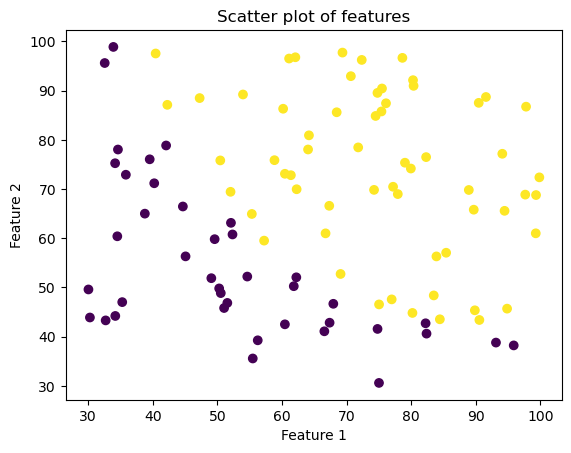

In [16]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of features')
plt.show()

In [17]:
#Sigmoid Function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
#Compute cost function

def compute_cost(x,y,w,b,lambda_):
    m,n = x.shape
    cost = 0

    for i in range(m):
        z_i = np.dpt(w,x[i]) + b
        f_wb_i = sigmoid(z_i)
        cost = cost + y[i]*np.log(f_wb_i) + (1-y[i])*np.log(1-f_wb_i)


    cost = -cost / m

    return cost

In [21]:
#Compute gradient

def compute_gradient(x,y,w,b,alpha):
    m,n = x.shape

    dj_dw = np.zeros(w.shape)
    dj_db = 0

    for i in range(m):
        z_i = np.dot(w,x[i]) + b
        f_wb_i = sigmoid(z_i)

        err = f_wb_i - y[i]

        for j in range(n):
            dj_dw[j] = dj_dw[j] + err*x[i,j]
        dj_db = dj_db + err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw,dj_db



In [ ]:
#Gradient descent

def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,)